# News Mood

In [5]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "QKgn6njuGSOLWK1hgBLFvRSmT"
consumer_secret = "W81c1NrGsF2ZS3EKjqLBFW9pEswdoxjA3Xb6JzV4YK7ytmDln9"
access_token = "115752339-YSjcEfJr2FketAuVWuNJEmNV6XNxanP8KuVA9clZ"
access_token_secret = "SmkUm9quhjuIxEu3NP7cY8YhEqpPEblx6Dj2kzw7nEwkl"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target Search Term
target_terms = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]

# Array to hold sentiment
sentiment_array = []
counter = 1


In [6]:
# Loop through each Term
for terms in target_terms:
    public_tweets = api.user_timeline(terms, count=100)
    tweetnumber = 1       
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetnumber
        sentiment_array.append({"Media Source": terms,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweetnumber})
        tweetnumber +=1
        counter +=1


Tweet 1: 'Change doesn't come from outside.'

#Pilgrimage: The Road to Santiago | 9pm | @BBCTwo https://t.co/N4Fxc0EU77
Tweet 2: ❤️ A dying man was granted his final wish in hospital - a visit from his dog. https://t.co/xE4rkcBJNv
Tweet 3: The illegal wildlife trade is worth £18bn per year, but @wildliferescue are working to turn it around.… https://t.co/fe3MDr2TN9
Tweet 4: RT @bbceurovision: 🇬🇧 Presenting our 2018 dream team! @Grahnort hosts the Grand Final on @BBCOne. Fresh from You Decide, we welcome @Rylan!…
Tweet 5: RT @BBCNews: Heartbeat actor Bill Maynard dies at 89 https://t.co/BMeMLwjPpV
Tweet 6: We use an estimated 8.5b plastic straws every year in the UK and they're among the top 10 items found in beach clea… https://t.co/K9r6HRVu3V
Tweet 7: Graphic artist Gabriella Marcella uses a vintage #Risograph printer to produce amazing designs. https://t.co/W9JK5vLbSf
Tweet 8: Meena was raised to be a ‘good Indian girl' - to cook, clean and find a husband.

But as an environmental ac

Tweet 101: Take and post a photo of the woman in your life who inspires you! The photo should only have one person against a n… https://t.co/BHdxXlWfKP
Tweet 102: Expect epic performances by @kanebrown , @kelly_clarkson, @OfficialJackson, and more at this year's 53rd #ACMawards… https://t.co/3yso7Z0cjv
Tweet 103: Will @HIGHVALLEY, @LancoMusic, @LOCASHmusic, @MidlandOfficial, or @runawayjune be named New Vocal Duo Or Group Of T… https://t.co/v0QIPLC47R
Tweet 104: Count on Entertainer Of The Year nominee @LukeBryanOnline to crash the party with an epic performance at the 53rd… https://t.co/27ua60HTqu
Tweet 105: Join @eltonofficial and some of today's hottest names in music when they take the stage to perform his most memorab… https://t.co/jz0jaShZIj
Tweet 106: RT @ACMawards: The ACM for New Vocal Group of the Year goes to @MidlandOfficial! And yes, that really was @Reba on the phone! #ACMawards ht…
Tweet 107: RT @ACMawards: In case you didn’t know, the ACM for New Male Vocalist of the Ye

Tweet 201: Arkansas is trying to make Big Pharma pay for the opioid crisis, accusing drug manufacturers in a new lawsuit of in… https://t.co/RGJDaMUOeY
Tweet 202: "She's only apologizing after a third of her advertisers pulled out," says Parkland survivor David Hogg, responding… https://t.co/UNxGLzeuSk
Tweet 203: The Trump administration will require visa applicants to submit five years of social media history https://t.co/M6qbYd6Uv1
Tweet 204: Attorney Gloria Allred has withdrawn from representing Summer Zervos in her defamation suit against President Trump… https://t.co/B5nHFIxFv8
Tweet 205: To critics who say she should "go away" after losing to Trump, Hillary Clinton says, "they never said that to any m… https://t.co/3RhjbE0NQh
Tweet 206: SpaceX launched another rocket on Friday, and this time it tried to land the $6 million nose cone into a giant seab… https://t.co/NMBsh3OQuX
Tweet 207: This Chinese space lab could plummet back to earth as early as Saturday https://t.co/ZSc6omLCy9

Tweet 301: @glenngillen I can tell a lot from about / careers pages and how a business conducts themselves. :)
Tweet 302: RT @jessamyn: NYTimes releases Diversity and Inclusion Report. With graphs that have differing Y axes that subtly give the wrong impression…
Tweet 303: @mjmichellekim also, thanks to you I’ve just discovered you can pitch pieces to Quartz 🙇🏻‍♀️
Tweet 304: “To achieve lasting change, you have to focus on something bigger than what you can measure in the short-term.” 

Y… https://t.co/4b5womubML
Tweet 305: I’m one of those people who create a spreadsheet for all the organisations I’m interviewing with, gather their dive… https://t.co/2RsVggo5yI
Tweet 306: @noopkat I subscribe to this newsletter
Tweet 307: @kissane Sorry for being unclear! I think citation is great, I often found resources I haven’t seen before, plus al… https://t.co/jcD3ZGYM7m
Tweet 308: @kissane So the approach of just hot linking to a website out there without considering how people could report, wh

Tweet 401: RT @nytimesarts: Kate Mara on her new movie “Chappaquiddick”: “Like a lot of people, I’m fascinated with the Kennedys and their history and…
Tweet 402: RT @NYTStyles: The Wing is under investigation for discrimination, but honestly ... that's only gotten it more press. https://t.co/uHGB7sVY…
Tweet 403: In college basketball, Catholic schools have long punched well above their weight. The reasons stretch back a centu… https://t.co/wJkwuvDZRS
Tweet 404: RT @dgelles: Cash may be king, but it's no longer essential. 

I've gone cashless. My essay here: 
https://t.co/laHrQD9j1F
Tweet 405: The midterm elections will determine the political script for the rest of President Trump’s first term. And Pennsyl… https://t.co/ZpZGFxjunA
Tweet 406: Puerto Ricans are trickling back to the island. They must come to terms with a Puerto Rico that is still crippled,… https://t.co/Wml9x3rYyw
Tweet 407: Hope Hicks has left the building. Those who remain are wondering what happens now. https://t.co/

In [7]:
sentiments_df = pd.DataFrame.from_dict(sentiment_array)
sentiments_df['Media Source'] = sentiments_df['Media Source'].map(lambda x: x.lstrip('@'))

In [8]:
# Data Frame for holding sentiments
sentiments_csv = sentiments_df[['Media Source','Date','Text','Compound','Positive','Neutral','Negative','Tweet Count']]
sentiments_csv.head() 

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBC,Fri Mar 30 17:06:00 +0000 2018,'Change doesn't come from outside.'\n\n#Pilgri...,0.0000,0.000,1.000,0.000,1
1,BBC,Fri Mar 30 16:26:45 +0000 2018,❤️ A dying man was granted his final wish in h...,0.5719,0.266,0.734,0.000,2
2,BBC,Fri Mar 30 16:02:04 +0000 2018,The illegal wildlife trade is worth £18bn per ...,-0.2144,0.073,0.810,0.116,3
3,BBC,Fri Mar 30 15:25:47 +0000 2018,RT @bbceurovision: 🇬🇧 Presenting our 2018 drea...,0.8715,0.377,0.623,0.000,4
4,BBC,Fri Mar 30 15:10:56 +0000 2018,RT @BBCNews: Heartbeat actor Bill Maynard dies...,0.0000,0.000,1.000,0.000,5


In [9]:
sentiments_csv.to_csv("500 News Mood Tweets.csv")

In [10]:
# Setting colors for each organization 
colors = {"BBC": "lightblue", "CBS":"green", "CNN":"red", "Fox":"blue", "nytimes": "yellow"}

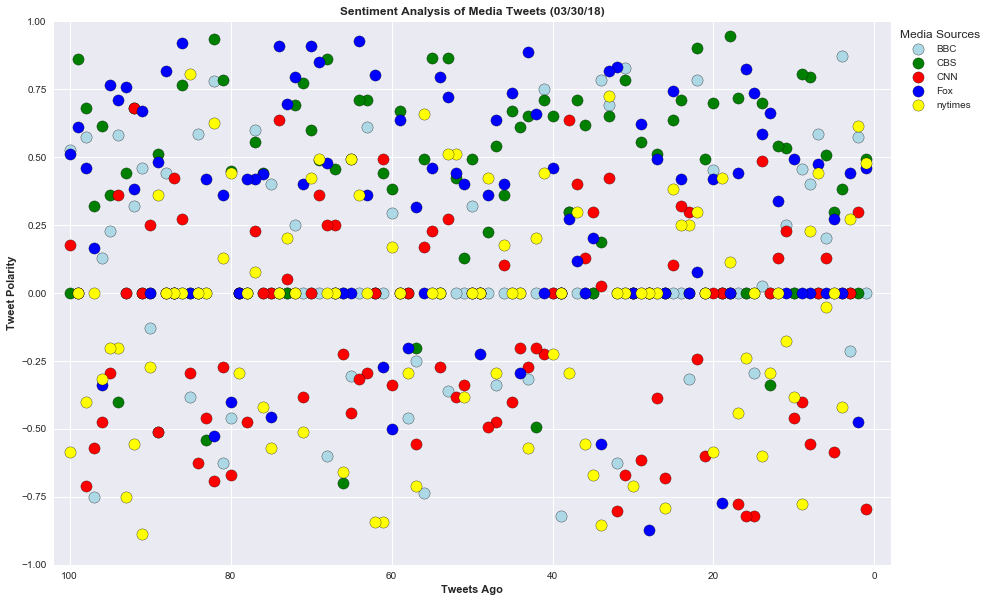

In [15]:
# Build the scatter plots for each media source 
plt.figure(figsize = (15,10))

for targets in colors.keys():
    Plot_DF = sentiments_df[sentiments_df['Media Source'] == targets] 
    plt.scatter(Plot_DF["Tweet Count"],
                Plot_DF["Compound"], 
                label = targets, color = colors[targets],
                edgecolor = "black", s=125)
    
plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')    

# Incorporate the other graph properties
plt.xlabel("Tweets Ago",fontweight='bold')
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")),fontweight='bold')
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
plt.grid(True)


# Save the figure
plt.savefig("SentimentAnalysis.png")

# Show plot
plt.show()

In [12]:
#Mean scores by organization
scoresbyorganization = sentiments_csv.groupby("Media Source")["Compound"].mean()
scoresbyorganization 


Media Source
BBC        0.065446
CBS        0.351304
CNN       -0.120065
Fox        0.291836
nytimes   -0.063961
Name: Compound, dtype: float64

In [13]:
x_axis = np.arange(len(scoresbyorganization))

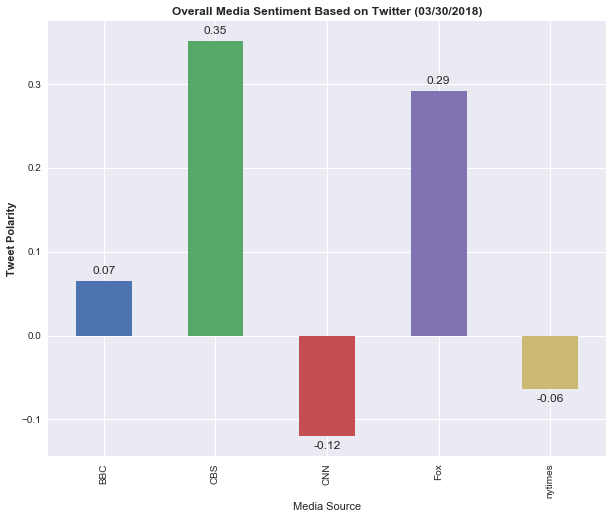

In [14]:
# Build the bar chart for each media source 
plt.figure(figsize = (10,8))

ax = scoresbyorganization.plot(kind='bar')
ax.set_title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
ax.set_ylabel("Tweet Polarity",fontweight='bold')
ax.set_xticklabels(["BBC", "CBS", "CNN", "Fox", "nytimes"])


rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x()+rect.get_width()/2
    space = 5
    if y_value < 0:
        space *= -3
        va = "top"
    label = "{:.2f}".format(y_value)
    plt.annotate(label,(x_value,y_value),xytext=(0, space),textcoords="offset points",ha="center",va='bottom')


# Save the figure
plt.savefig('Overall Media Sentiment Based on Twitter.png')

# Show plot
plt.show()